In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microsoft-catsvsdogs-dataset/readme[1].txt
/kaggle/input/microsoft-catsvsdogs-dataset/MSR-LA - 3467.docx
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7981.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6234.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/1269.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3863.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6241.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10304.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/623.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2193.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11925.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3750.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11378.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2008.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10730.jpg
/kaggle/input/micros

# image classification for cats and dogs by CNN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import keras
import warnings
warnings.filterwarnings('ignore')

In [3]:
base_model=InceptionV3(input_shape=(256,256,3),include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


# training CNN model

In [4]:
for layer in base_model.layers:
    layer.trainable=False

In [5]:
X=Flatten()(base_model.output)
X=Dense(units=2,activation='sigmoid')(X)
model=Model(base_model.input,X)
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])
#models summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

# load the images

In [6]:
train_datagen=ImageDataGenerator(featurewise_center=True,rotation_range=.4,width_shift_range=.3,horizontal_flip=True,preprocessing_function=preprocess_input,zoom_range=0.4,height_shift_range=0.3,shear_range=0.4)
train_data=train_datagen.flow_from_directory(directory='/kaggle/input/microsoft-catsvsdogs-dataset/PetImages',target_size=(256,256),batch_size=64)

Found 25000 images belonging to 2 classes.


In [7]:
train_data.class_indices

{'Cat': 0, 'Dog': 1}

# visualizing the data

In [8]:
t_img,label=train_data.next()
t_img.shape

(64, 256, 256, 3)

In [9]:
def plotimages(img_arr,label):
    '''
    input:image array
    output:plot images
    '''
    for idx,img in enumerate(img_arr):
        if idx<=10:
            plt.figure(figsize=(5,5))
            plt.imshow(img)
            plt.title(img.shape)
            plt.axis=False
            plt.show()

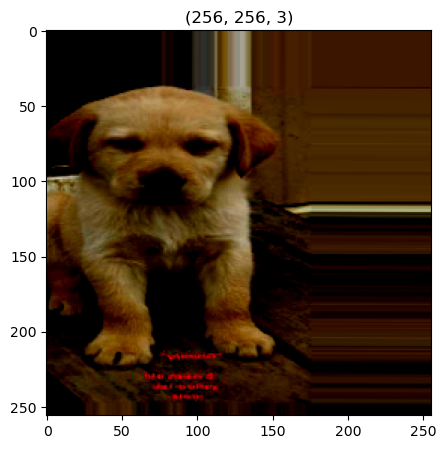

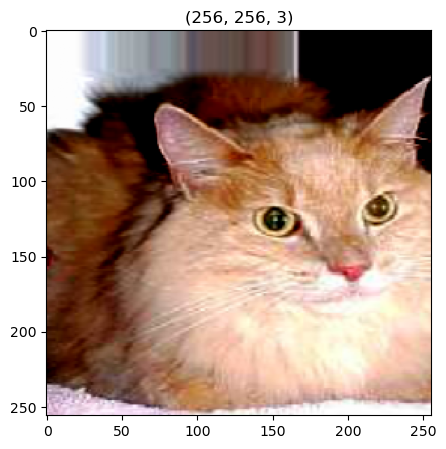

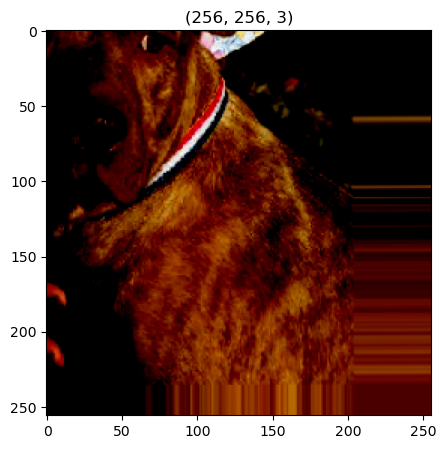

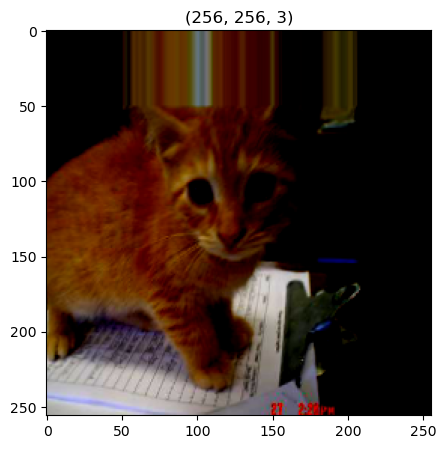

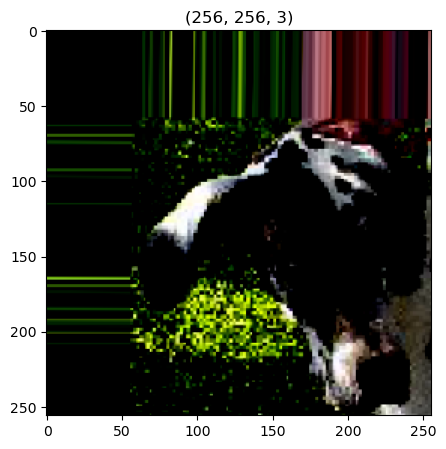

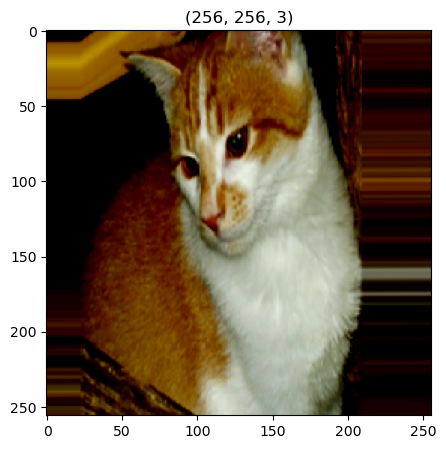

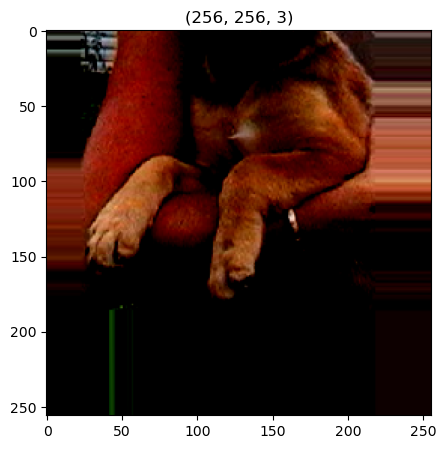

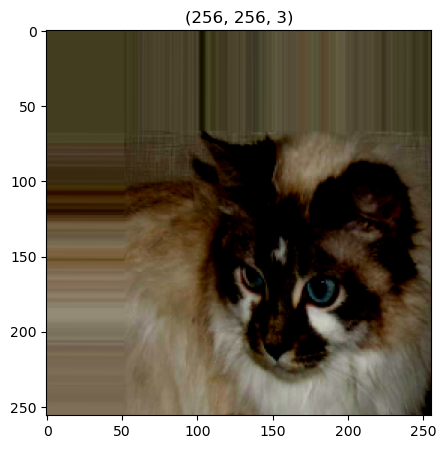

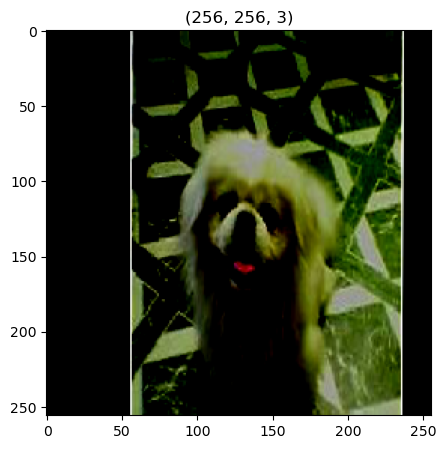

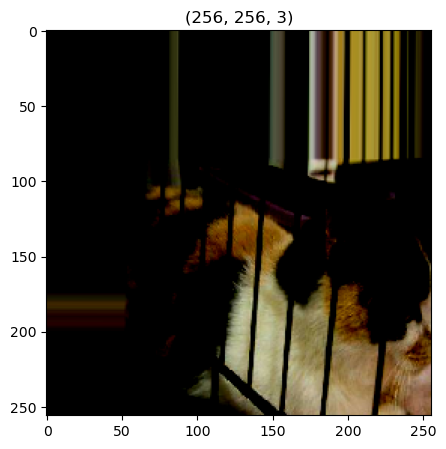

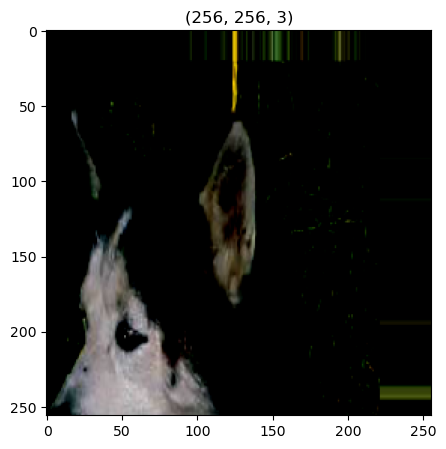

In [10]:
plotimages(t_img,label)

# model check point

In [11]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
mc=ModelCheckpoint(filepath='./best_model.h5',monitor='accuracy',verbose=1,save_best_only=True)
es=EarlyStopping(monitor='accuracy',min_delta=.01,patience=3,verbose=1)
cb=[mc,es]

In [12]:
hist=model.fit_generator(train_data,steps_per_epoch=10,epochs=30,callbacks=cb)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 0.7282 - accuracy: 0.8094
Epoch 1: accuracy improved from -inf to 0.80937, saving model to ./best_model.h5
10/10 [==============================] - 29s 2s/step - loss: 0.7282 - accuracy: 0.8094
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.3093 - accuracy: 0.9500
Epoch 2: accuracy improved from 0.80937 to 0.95000, saving model to ./best_model.h5
10/10 [==============================] - 16s 2s/step - loss: 0.3093 - accuracy: 0.9500
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.5587 - accuracy: 0.9375
Epoch 3: accuracy did not improve from 0.95000
10/10 [==============================] - 16s 2s/step - loss: 0.5587 - accuracy: 0.9375
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.4087 - accuracy: 0.9625
Epoch 4: accuracy improved from 0.95000 to 0.96250, saving model to ./best_model.h5
10/10 [==============================] - 17s 2s/step - loss: 0.4087

# visualizing loss and accuracy

In [13]:
h=hist.history
h.keys()

dict_keys(['loss', 'accuracy'])

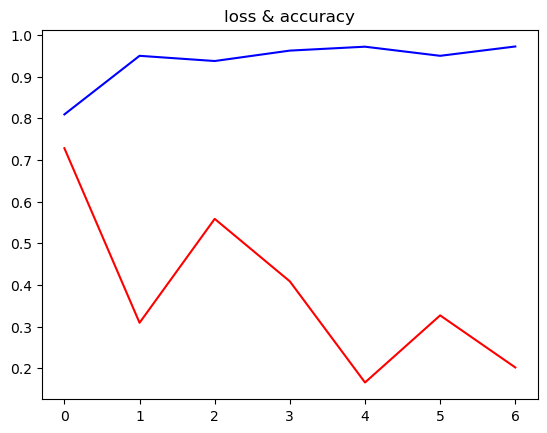

In [14]:
plt.plot(h['loss'],c='red')
plt.plot(h['accuracy'],c='blue')
plt.title('loss & accuracy')
plt.show()

# model validation

1/1 [==============================] - 2s 2s/step
the image is cat


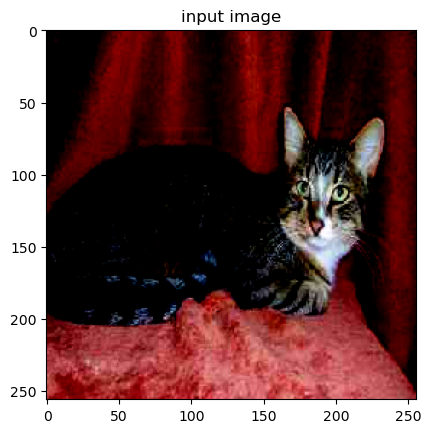

In [15]:
import tensorflow as tf
img = tf.keras.preprocessing.image.load_img('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/10004.jpg',target_size=(256,256))
i= tf.keras.preprocessing.image.img_to_array(img)
i=preprocess_input(i)
input_arr = np.array([i])
input_arr.shape
pred= np.argmax(model.predict(input_arr))
if pred==0:
    print('the image is cat')
else:
        print('the image is dog')
plt.imshow(input_arr[0])
plt.title('input image')
plt.show()

1/1 [==============================] - 0s 33ms/step
the image is dog


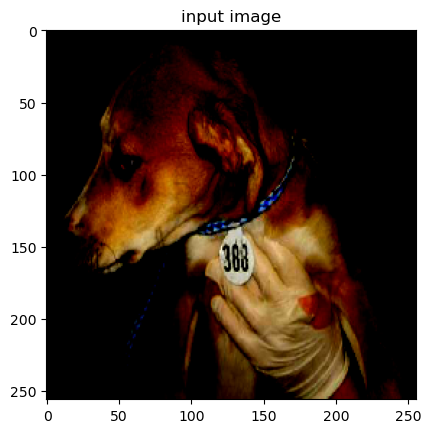

In [16]:
import tensorflow as tf
img = tf.keras.preprocessing.image.load_img('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10006.jpg',target_size=(256,256))
i= tf.keras.preprocessing.image.img_to_array(img)
i=preprocess_input(i)
input_arr = np.array([i])
input_arr.shape
pred= np.argmax(model.predict(input_arr))
if pred==0:
    print('the image is cat')
else:
        print('the image is dog')
plt.imshow(input_arr[0])
plt.title('input image')
plt.show()